Milan Gomez Villalba 000428696

In [705]:
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Comparaison entre nos générateurs et les générateurs de numpy

challenge 1, lesson 6_02 :
Nous allons comparer les résultat obtenu par nos générateur avec les résultats obtenu par les générateurs numpy

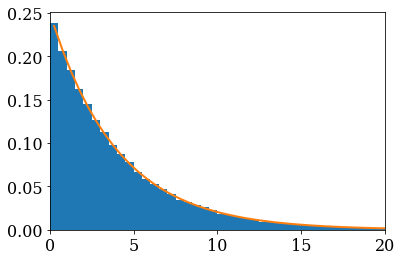

In [706]:
# Our generator using the method of invertible distribution

alpha = 0.25 # rate of the exponential distribution
N = 100000
x = numpy.random.random_sample(N)
y = -1/alpha*numpy.log(1-x)

# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)


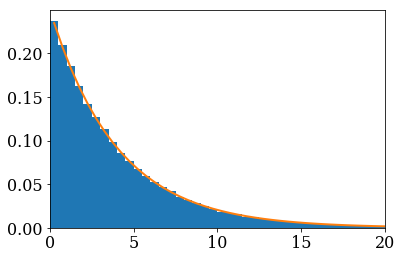

In [707]:
# numpy exponential generator
y = numpy.random.exponential(scale=1/alpha, size=N)

# plot hist with the same parameters
pyplot.xlim(0,20)
pyplot.hist(y,bins,normed=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

Les résultats sont semblables pour la fonction exponentiel. Comparons maintenant le générateur gaussien

Acceptance ratio: 0.35792


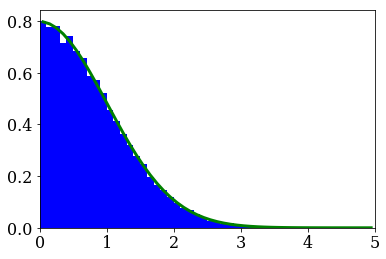

In [708]:
# Our gaussian generator using the Von Neumann rejection method

# Distribute g according to the exponential distribution
uniform1 = numpy.random.random_sample(N)
g = numpy.log(1/(1-uniform1))

# Probabilty of drawing g according to the exponential distribution
p_g_exp = numpy.exp(-g)

# Probability of drawing g according to the (positive) normal distribution , mean = 0, standard deviation = 1
p_g_gauss = numpy.exp(-(g**2)/2.0)/numpy.sqrt(2*numpy.pi)

# Draw a second uniform distribution for the acceptance
uniform2 = numpy.random.random_sample(N)

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = numpy.extract(condition,g)

# Print the acceptance ratio
print("Acceptance ratio:",h.size/g.size)

# Plots
binwidth=0.1
pyplot.xlim(0,5)
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')



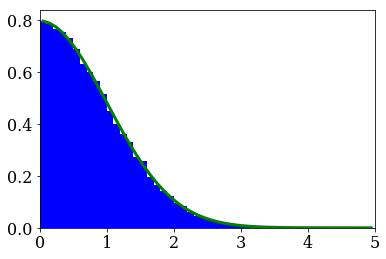

In [709]:
# numpy gaussian generator
y = numpy.random.normal(loc=0.0, scale=1.0, size=N)

# Plots
binwidth=0.1
pyplot.xlim(0,5)
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(y,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')



ici aussi, nos résultats sont similaires.

# Implementation de la méthode Box-Muller

Challenge 2 , lesson 6_02 : Nous allons générer une distribution gaussienne à l'aide de la méthode Box-Muller

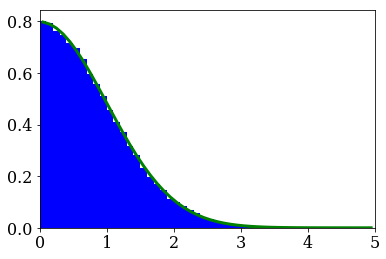

In [710]:
# Two independant sample from the interval [0,1)
u1 = numpy.random.random_sample(round(N/2))
u2 = numpy.random.random_sample(round(N/2))

# we make the independant random variable following the basic form Box-Mueller algorithm 
# found in this page https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform
z0 = numpy.sqrt(-2*numpy.log(u1))*numpy.cos(numpy.pi*u2)
z1 = numpy.sqrt(-2*numpy.log(u1))*numpy.sin(numpy.pi*u2)
z = numpy.append(z0,z1)

# Plots
binwidth=0.1
pyplot.xlim(0,5)
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(z,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

Cette algorithme donne des résulats semblale à ceux générés par la fonction numpy

# Marche aléatoire

Challenge 1, lesson 6_03 : Nous allons simuler un déplacement 
$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

et essayer de trouver son expression analytique. Pour cela , nous allons étudier le comportement d'un pacquet de 20 molécule

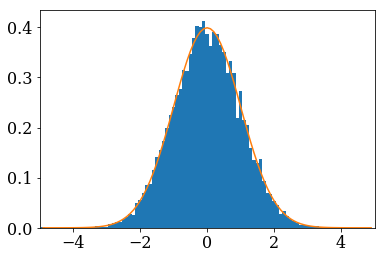

In [711]:
# Generate a set of initial positions based on the Gaussian distribution
npart=10000 # do it with bigger npart for better result but my computer 

# We set mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
pyplot.xlim(-5,5)
pyplot.hist(x0,bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2))

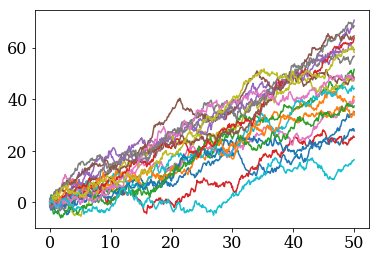

In [713]:
# Our parameters
T=50.0  # time
nt=500  # number of step
dt=T/nt
alpha=2.0
# constant of the delplacement
c = 1.

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart) + c*dt

for i in range(20):
    pyplot.plot(t,x[:,i])


Nous remarquons que le mouvement est encore aléatoire mais qu'il se déplace vers la droite. c'est due au terme c*dt qui pousse les molécule vers la droite si c est positive où vers la gauche si c est négatif. cela équivaut à la même distribution gaussienne que précedement sauf que $\mu_t = c*t$. c'est à dire : 

$$
\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-\mu_{t})^2}{2\sigma_t^2}}
$$

avec $\sigma^2_t = 2\alpha t + \sigma^2$ et $\mu_{t} = c*t$ .

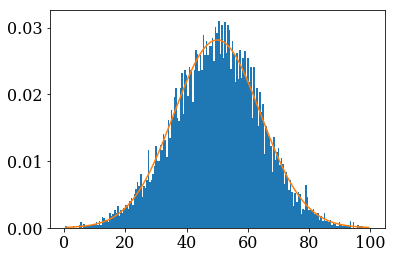

In [714]:
# Generate bins centered around c*t
binwidth=0.5
bins=numpy.arange(-50 + c*T,50 + c*T,binwidth) # + c*t because the graph is moving with time
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

sigmat2=2*alpha*T+sigma**2 # the standard deviation after t
u = c*T # the mean after t
pyplot.plot(bin_centers, numpy.exp(-(bin_centers- u)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))

ça à l'air de fonctionner

Faisons de même pour un déplacement 
$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$


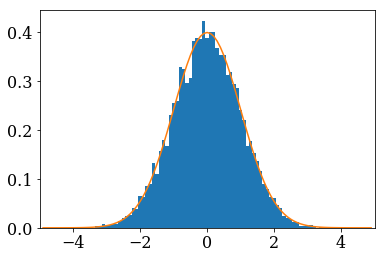

In [715]:
# Generate a set of initial positions based on the Gaussian distribution
npart=10000

# We set mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
pyplot.xlim(-5,5)
pyplot.hist(x0,bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2))

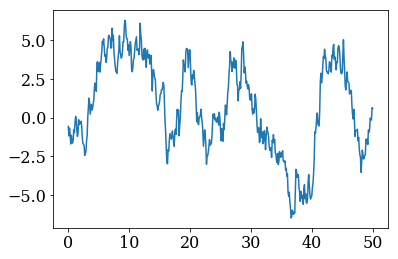

In [716]:
T=50.0
nt=500
dt=T/nt
alpha=2.0
# constant of friction
y = 0.2

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])


x[0]=x0

for i in range(nt):
    x[i+1]=x[i]*(1-y*dt)+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(1):
    pyplot.plot(t,x[:,i])


Nous pouvons modifier le code pour étudier un intervalle de temps plus long et nous remarquerons aussi que l'écart type ne dépend plus du temps.

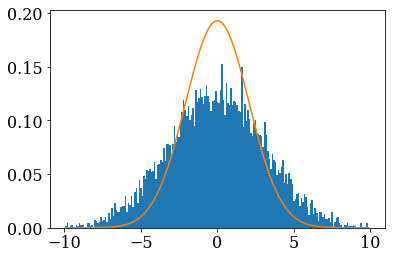

In [717]:
# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-10,10,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

sigmat2= 2*(alpha)*numpy.exp(-y) + sigma**2 
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))

Si l'on répète la simulation plusieur fois en faisant varier les paramètre $\alpha$ et $\gamma$, nous remarquons une croissance linéaire de l'écart type en fonction de $\alpha$ et une décroissance exponentiel de l'écart type en fonction de $\gamma$ mais nous n'avons pas réussi à trouver l'expression exact. 

# Modèle d'Ising

Challenge 1, lesson 6_04 : vérifions que ce n'est pas une coincidence due à nos conditions initial. Pour cela, nous allons générer des canevas pour lesquelles les spins sont aligné de manière aléatoire.

In [718]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

In [719]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy



In [720]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

In [721]:
# We create a lattice of random orientation of dimension nx*ny
nx = 10 
ny = 10
sp = initial_state(nx,ny)

In [722]:
# we calculate the probability of a flip
alpha = 0.1
ix = 0
iy = 0
sigma = sp[ix,iy]
E_flip = energy_at_site(sp,alpha,-sigma,ix,iy) - energy_at_site(sp,alpha,sigma,ix,iy)
p = numpy.exp(-E_flip)
p

1.0

Nous avons alors calculer une probabilité grâce au modèle d'ising. Comparons là à celle obtenus grâce à l'algorithme de Metropolis

In [723]:
NMC = 100000
states = numpy.empty(NMC+1)
states[0]=sp[ix,iy]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,ix,iy)
    states[n]=sp[ix,iy]

after_flip = numpy.extract(states==-sigma, states).size
before_flip = NMC - after_flip
print(after_flip/before_flip)


1.0


Nous constatons qu'elle sont extremement proche. Nous pouvons augmenter NMC et constater que la valeur sera encore plus proche.

# Energie et magnetisation en fonction d'alpha

Challenge 2 , lesson 6_04 : Nous allons utiliser le modèle d'ising et l'algorithme de metropolis pour calculer l'energie et la magnétisation en fonction du paramètre $\alpha$

In [724]:
def ising_model_metropolis(sp, NMC, alpha, nx, ny):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

In [725]:
def Energie(sp,alpha,nx,ny):
    """ Calculate the energie of a lattice nx * ny for the Ising model
    
    Parameters:
    ----------
    sp   : 2D array
        lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    E : total energie of the lattice
    """
    E = 0
    for j in range(ny):
        for i in range(nx):
            E += energy_at_site(sp,alpha,sp[i,j],i,j)
    return E

In [726]:
def average_Energie(sp,NMC,alpha,nx,ny):
    """ return the average energie for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    E_av: average energie
    """
    E_tot = 0
    for i in range(NMC): 
        E_tot += Energie(sp[i+1],alpha,nx,ny)
    E_av = E_tot/NMC
    return E_av

In [727]:
def average_magnetisation(sp,NMC, nx ,ny):
    """ return the average magnetisation for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    M_av: average magnetisation
    """
    M_tot = 0
    for k in range(NMC):
        M = 0
        for i in range (nx):
            for j in range (ny):
                M += sp[k+1,i,j]
        M_tot += M
    M_av = M_tot / NMC
    return M_av

In [728]:
# our parameters
dalpha = 0.05 # our step in alpha
alpha = 0.0
nx = 20 # increasing nx and ny make the graph more stable
ny = 20
NMC = 100 # the amount of state, create more for better result

energie = []
magnetisation = []
alpha_x = []

while alpha <= 1 :
    sp = numpy.ones([nx,ny]) # we have to reasign it because our metropolis algoritm modify the array sp
    states = ising_model_metropolis(sp, NMC, alpha, nx, ny)
    energie.append(average_Energie(states, NMC, alpha,nx, ny))
    magnetisation.append(average_magnetisation(states, NMC, nx, ny))
    alpha_x.append(alpha)
    alpha += dalpha



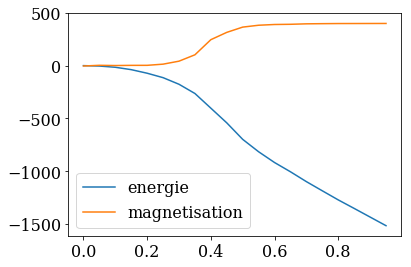

In [729]:
pyplot.figure()
pyplot.plot(alpha_x,energie,label=r'energie')
pyplot.plot(alpha_x,magnetisation,label=r'magnetisation')
pyplot.legend()
pyplot.tight_layout()

La solution exact d'onsager est $T_c = \frac{2J}{k_b * ln(1 + \sqrt2)}$ . Nous avons posé $\alpha = \frac{J}{k_b * T}$ , nous obtenons alors $ T_c = \frac{2(k_b * T_c * \alpha_c)}{k_b * ln(1 + \sqrt2)} $ . Cela se simplifie en $\alpha_c = \frac{ln(1 + \sqrt2)}{2} = 0,44$ . Nous pouvons voir graphiquement que la transition se passe au environ de 0,4 .

# Condition au bord et état initials différents

Challenge 3, lesson 6_04 : Nous allons répetez l'analyse mais pour des conditions de spin up sur les bords qui seront fixe et des spin aléatoire à l'intérieure.

In [730]:
def energy_at_site(sp,alpha,sigma,ix,iy): # we keep the same name to recycle the previous code
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with upwards spin boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    nx = len(sp) - 1
    ny = len(sp[0]) - 1
    
    if ix == 0 and iy == 0: # in the corner, the point only has 2 neighbors
        energy=-alpha*sigma*(+sp[(ix+1),iy]+sp[ix,(iy+1)])
    elif ix == 0 and iy == ny:
        energy=-alpha*sigma*(sp[(ix+1),iy]+sp[ix,(iy-1)])
    elif ix == nx and iy == 0:
        energy=-alpha*sigma*(sp[(ix-1),iy]+sp[ix,(iy+1)])
    elif ix == nx and iy == ny:
        energy=-alpha*sigma*(sp[(ix-1),iy]+sp[ix,(iy-1)])
    elif ix == 0 and iy != (0 or ny): # on the boundary, outside of the corner, the point have 3 neighbors
        energy=-alpha*sigma*(sp[(ix+1),iy]+sp[ix,(iy-1)]+sp[ix,(iy+1)])
    elif ix == nx and iy != (0 or ny):
        energy=-alpha*sigma*(sp[(ix-1),iy]+sp[ix,(iy-1)]+sp[ix,(iy+1)])
    elif ix != (0 or nx) and iy == 0:
        energy=-alpha*sigma*(sp[(ix-1),iy]+sp[(ix+1),iy]+sp[ix,(iy+1)])
    elif ix != (0 or nx) and iy == ny:
        energy=-alpha*sigma*(sp[(ix-1),iy]+sp[(ix+1),iy]+sp[ix,(iy-1)])
    else : 
        energy=-alpha*sigma*(sp[(ix-1),iy]+sp[(ix+1),iy]+sp[ix,(iy-1)]+sp[ix,(iy+1)])

    return energy



In [731]:
def ising_model_metropolis(sp, NMC, alpha, nx, ny): # we modify it so that it doesn't choose a point in the boundary
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(1,nx-1) # we changed the value to avoid flipping the orientation of the boundary
            iy=numpy.random.randint(1,ny-1)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

In [732]:
dalpha = 0.05
alpha = 0.0
nx = 20 # increasing nx and ny make the graph more stable
ny = 20
NMC = 100

# we create a lattice with random orientation of spin inside and spin equal to one on every side
sp_ini = initial_state(nx,ny)
sp_ini[0] = sp_ini[nx-1] = 1
sp_ini[:,0] = sp_ini[:,ny-1] = 1

energie = []
magnetisation = []
alpha_x = []

while alpha <= 1 :
    sp = sp_ini.copy()
    states = ising_model_metropolis(sp, NMC, alpha, nx, ny)
    energie.append(average_Energie(states, NMC, alpha,nx, ny))
    magnetisation.append(average_magnetisation(states, NMC, nx, ny))
    alpha_x.append(alpha)
    alpha += dalpha



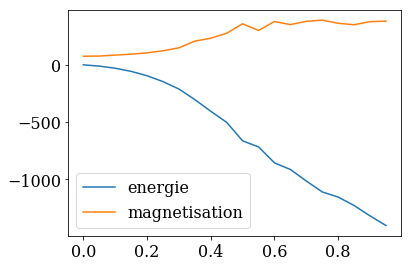

In [733]:
pyplot.figure()
pyplot.plot(alpha_x,energie,label=r'energie')
pyplot.plot(alpha_x,magnetisation,label=r'magnetisation')
pyplot.legend()
pyplot.tight_layout()

Nous remarquons que la magnetisation ne devient jamais 0 à cause de nos conditions au bord. Nous remarquons aussi une transition entre 0,4 et 0,5 et puis une magnetisation +- constante. Si notre ordinateur était assez puissant, nous pourrions augmenter le nombre d'état à générer et la taille du canevas pour obtenir un meilleur graphique.